# <center> Elementy numerycznej algebry liniowej </center>

Rozwiązywanie układów równań liniowych jest jednym z podstawowych problemów metod numerycznych. Układy równań liniowych występują w wielu dziedzinach nauki i inżynierii. Stosuje się też w uczeniu maszynowym np. podczas regresji z błędem średniokwadratowym. 


Istnieje kilka metod rozwiązywania układów równań. Na dzisiejszych zajęciach zajmiemy się:
* eliminacją Gaussa bez oraz z wyborem elementu głównego,
* metodami iteracyjnymi.

Problem rozwiązywania układu równań liniowych będzie nam towarzyszły do końca zajęć z tego przedmiotu.

## Normy i wskaźniki uwarunkowania

Wrażliwość układu (zmiana rozwiązania) na niewielkie zaburzenia wektora `b` zależy od macierzy `A` i ocenia się ja za pomocą tzw. współczynnika lub [wskaźnika uwarunkowania macierzy](https://pl.wikipedia.org/wiki/Wskaźnik_uwarunkowania) (ang. *condition number*). Im wyższa wartość tego wskaźnika. tym macierz jest gorzej uwarunkowana. Wskaźnik uwarunkowania to iloczyn normy macierzy z normą jej odwrotności.

$$cond(A)=|A|_{p}\cdot|A^{-1}|_{p}$$
gdzie *p* oznacza jedną z norm macierzy.

In [30]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

***Zadanie 1.***

Porównaj normy 1,2, $\infty$ następujących macierzy:
* [Hilberta](https://pl.wikipedia.org/wiki/Macierz_Hilberta): o wymiarach 5x5 i 15x15
* [Vandermonde'a](https://pl.wikipedia.org/wiki/Macierz_Vandermonde’a): o wymiarach 5x5 i 15x15
* losowej o wartościach z przedziału [0,1]:  o wymiarach 5x5 i 15x15
* $P=\left[\begin{array}{cccc}4 & 1 & -1 & 0 \\ 1 & 3 & -1 & 0 \\ -1 & -1 & 5 & 2 \\ 0 & 0 & 2 & 4\end{array}\right]$

Czy wśród powyższych macierzy jest macierz [diagonalnie dominująca](https://pl.wikipedia.org/wiki/Macierz_przekątniowo_dominująca)?


In [31]:
H5 = scipy.linalg.hilbert(5)
print("Macierz Hilberta H5:\n", H5)
print("\nNorma 1 macierzy H5:", scipy.linalg.norm(H5, ord=1))
print("\nNorma 2 macierzy H5:", scipy.linalg.norm(H5, ord=2))
print("\nNorma nieskończoności macierzy H5:", scipy.linalg.norm(H5, ord=np.inf))

H15 = scipy.linalg.hilbert(15)
print("\nMacierz Hilberta H15:\n", H15)
print("\nNorma 1 macierzy H15:", scipy.linalg.norm(H15, ord=1))
print("\nNorma 2 macierzy H15:", scipy.linalg.norm(H15, ord=2))
print("\nNorma nieskończoności macierzy H15:", scipy.linalg.norm(H15, ord=np.inf))  

V5 = np.vander([1, 2, 3, 4, 5], increasing=True)
print("\nMacierz Vandermonde V5:\n", V5)
print("\nNorma 1 macierzy V5:", scipy.linalg.norm(V5, ord=1))
print("\nNorma 2 macierzy V5:", scipy.linalg.norm(V5, ord=2))
print("\nNorma nieskończoności macierzy V5:", scipy.linalg.norm(V5, ord=np.inf))    

V15 = np.vander(np.arange(1, 16), increasing=True)
print("\nMacierz Vandermonde V15:\n", V15)
print("\nNorma 1 macierzy V15:", scipy.linalg.norm(V15, ord=1))
print("\nNorma 2 macierzy V15:", scipy.linalg.norm(V15, ord=2))
print("\nNorma nieskończoności macierzy V15:", scipy.linalg.norm(V15, ord=np.inf))

R5 = np.random.rand(5, 5)
print("\nLosowa macierz R5:\n", R5)
print("\nNorma 1 macierzy R5:", scipy.linalg.norm(R5, ord=1))
print("\nNorma 2 macierzy R5:", scipy.linalg.norm(R5, ord=2))
print("\nNorma nieskończoności macierzy R5:", scipy.linalg.norm(R5, ord=np.inf))

R15 = np.random.rand(15, 15)
print("\nLosowa macierz R15:\n", R15)
print("\nNorma 1 macierzy R15:", scipy.linalg.norm(R15, ord=1))
print("\nNorma 2 macierzy R15:", scipy.linalg.norm(R15, ord=2))
print("\nNorma nieskończoności macierzy R15:", scipy.linalg.norm(R15, ord=np.inf))

P = np.array(
    [[4, 1, -1, 0],
     [1, 3, -1, 0],
     [-1, -1, 5, 2],
     [0, 0, 2, 4]]
) # jest diagonalnie dominująca
print("\nMacierz P:\n", P)
print("\nNorma 1 macierzy P:", scipy.linalg.norm(P, ord=1))
print("\nNorma 2 macierzy P:", scipy.linalg.norm(P, ord=2))
print("\nNorma nieskończoności macierzy P:", scipy.linalg.norm(P, ord=np.inf))

Macierz Hilberta H5:
 [[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]

Norma 1 macierzy H5: 2.283333333333333

Norma 2 macierzy H5: 1.567050691098231

Norma nieskończoności macierzy H5: 2.283333333333333

Macierz Hilberta H15:
 [[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857 0.06666667]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308
  0.07142857 0.06666667 0.0625    ]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1        0.09090909 0.08333333 0.07692308 0.07142857
  0.06666667 0.0625     0.05882353]
 [0.25       0.2  

*Wskazówka: Do wyznaczenia norm możesz wykorzystać funkcję `numpy.linalg.norm`*

***Zadanie 2.***

Oblicz wskaźniki uwarunkowania macierzy z poprzedniego zadania.

*Wskazówka: Możesz wykorzystać funkcję `numpy.linalg.cond`.*

In [32]:
mats = {"H5": H5, "H15": H15, "V5": V5, "V15": V15, "R5": R5, "R15": R15, "P": P}
for name, A in mats.items():
    print(f"Cond. number for {name}: {np.linalg.cond(A):.3e}")

Cond. number for H5: 4.766e+05
Cond. number for H15: 4.239e+17
Cond. number for V5: 2.617e+04
Cond. number for V15: 4.425e+19
Cond. number for R5: 3.922e+01
Cond. number for R15: 2.218e+02
Cond. number for P: 3.543e+00


## Rozwiązywanie układów równań metodą eliminacji Gaussa

***Zadanie 3.***

Jedną z metod rozwiązywania układów równań liniowych jest metoda eliminacji Gaussa. Metoda ta występuje w kilku odmianach. Poza podstawowym wariantem, możliwe jest zastosowanie metody z wyborem elementu głownego (tzw. *pivoting*). 

Celem tego zadania jest porównanie błędów rozwiązania otrzymanego z tych dwóch wariantów eliminacji Gaussa. Poniżej znajdują się implementacje obu tych metod. Każda z funkcji przyjmuje macierz `A` oraz wektor prawej strony równania `b`.

Samo polecenie znajduje się poniżej.

In [33]:
def gauss_pivot(A, b):
    A=A.copy()
    b=b.copy()
    n = len(b)
    for k in range(n-1):
        ind_max = k
        for j in range(k+1, n):
            if abs(A[j,k]) > abs(A[ind_max,k]):
                ind_max = j
        if ind_max > k:
            tmp = A[ind_max,k:n].copy()
            A[ind_max,k:n] = A[k,k:n]
            A[k,k:n] = tmp
            tmp = b[ind_max].copy()
            b[ind_max] = b[k]
            b[k] = tmp
        akk = A[k,k]
        l = A[k+1:n,k] / akk
        for i in range(k+1, n):
            A[i,k] = 0
            A[i,k+1:n] = A[i,k+1:n] - l[i-k-1] * A[k,k+1:n]
            b[i] = b[i] - l[i-k-1] * b[k]
    x = np.zeros(n)
    x[n-1] = b[n-1]/A[n-1,n-1]
    for k in range(n-2, -1, -1):
        x[k] = (b[k] - np.dot(A[k,k+1:n], x[k+1:n])) / A[k,k]
    return x

In [34]:
def gauss(A, b):
    A=A.copy()
    b=b.copy()
    n = len(b)
    for k in range(n-1):
        akk = A[k,k]
        l = A[k+1:n,k] / akk
        for i in range(k+1, n):
            A[i,k] = 0
            A[i,k+1:n] = A[i,k+1:n] - l[i-k-1] * A[k,k+1:n]
            b[i] = b[i] - l[i-k-1] * b[k]
    x = np.zeros(n)
    x[n-1] = b[n-1] / A[n-1,n-1]
    for k in range(n-2, -1, -1):
        x[k] = (b[k] - np.dot(A[k,k+1:n], x[k+1:n])) / A[k,k]
    return x

Stwórz macierze wartości losowych `A` o wymiarach 10x10 oraz wektor `b` o odpowiednich wymiarach. 
Chcemy rozwiązać układ równań `Ax=b` metodami eliminacji Gaussa bez oraz z wyborem elementu głównego, a następnie porównać dokładność wyników. Metoda z wyborem elementu głównego powinna dawać mniejszy błąd w przypadku dużych wartości znajdujących się na przekątnej. Sprawdź czy to prawda powtarzając obliczenia z  macierzami `A` zawierającym na pierwszym elemencie przekątnej coraz to mniejsze wartości (tak aby wzrosło znaczenie dalszych elementów na przękątnej i tym samym uaktywnił się wybór innego niż pierwszy elementu głównego).

Wskazówka:Do porównania możesz wykorzystać residuum. Jeżeli `x` jest rozwiązaniem układu to `Ax` powinno być równe `b`. Residuum to różnica pomiędzy `b` oraz `Ax`: `res=|b-Ax|`. Możesz porównać zawartości poszczególnych elementów lub obliczyć jakąś normę z otrzymanego wektora.

In [35]:
A = np.random.rand(10, 10) # matrix
b = np.random.rand(10) # vector

x = gauss(A, b)
x_pivot = gauss_pivot(A, b)
# calculating residuum
residuum = np.linalg.norm(b - A @ x)
residuum_pivot = np.linalg.norm(b - A @ x_pivot)

print("Rozwiązanie bez pivotingu:\n", x)
print(f"Residuum bez pivotingu: {residuum:.3e}\n")
print("Rozwiązanie z pivotingiem:\n", x_pivot)
print(f"Residuum z pivotingiem: {residuum_pivot:.3e}\n")

# pivoting gives smaller residuum

# now lets lower a[0][0]
scales = [1/2, 1e-1, 1e-2, 1e-5, 1e-8, 1e-10]

for scale in scales:
    A_test = A.copy()
    A_test[0, 0] *= scale  # lowering the first diagonal element
    
    print(f"\nA[0,0] = {A_test[0,0]:.2e}")
    
    try:
        x_gauss = gauss(A_test, b)
        res_gauss = np.linalg.norm(b - A_test @ x_gauss)
        print(f"    No pivot:  residuum = {res_gauss:.3e}")
    except:
        print(f"/0 or smth")
    
    try:
        x_pivot = gauss_pivot(A_test, b)
        res_pivot = np.linalg.norm(b - A_test @ x_pivot)
        print(f"    With pivot:  residuum = {res_pivot:.3e}")
    except:
        print(f"/0 or smth")

# yes pivoting helps A LOT when the leading diagonal element is small


Rozwiązanie bez pivotingu:
 [ 0.92248222  0.1091312   1.06068531 -0.87454568  0.3114942  -0.37494518
  0.17549132  0.14281765 -0.21819662 -1.00134875]
Residuum bez pivotingu: 7.692e-16

Rozwiązanie z pivotingiem:
 [ 0.92248222  0.1091312   1.06068531 -0.87454568  0.3114942  -0.37494518
  0.17549132  0.14281765 -0.21819662 -1.00134875]
Residuum z pivotingiem: 4.578e-16


A[0,0] = 2.97e-01
    No pivot:  residuum = 3.305e-15
    With pivot:  residuum = 1.217e-15

A[0,0] = 5.94e-02
    No pivot:  residuum = 2.632e-14
    With pivot:  residuum = 4.923e-15

A[0,0] = 5.94e-03
    No pivot:  residuum = 4.852e-13
    With pivot:  residuum = 7.632e-15

A[0,0] = 5.94e-06
    No pivot:  residuum = 3.736e-10
    With pivot:  residuum = 1.033e-14

A[0,0] = 5.94e-09
    No pivot:  residuum = 2.192e-07
    With pivot:  residuum = 1.237e-14

A[0,0] = 5.94e-11
    No pivot:  residuum = 2.895e-05
    With pivot:  residuum = 9.969e-15


## Metody iteracyjne

Innym sposobem na rozwiązanie układu równań liniowych jest wykorzystanie metod iteracyjnych, które generują ciągi przybliżeń wektora stanowiącego rozwiązanie układu. Państwa zadaniem będzie implementacja i porównanie zbieżności trzech najpopularniejszych metod iteracyjnego rozwiązywania układów równań liniowych

***Zadanie 4.***

Porównanie zbieżności metod Jacobiego, Gaussa-Seidla i Younga (SOR).
* Zaimplementuj solvery rozwiązujące układy równań metodami Jacobiego, Gaussa-Seidela  i Younga (SOR). Każda funkcja powinna przyjmować macierz A i wektor prawej strony b. Dla uproszczenia, dopuszczalne jest wykorzystanie  inv dla obliczenia macierzy odwrotnej do macierzy trójkątnej (w metodzie G-S i Younga).
* Porównaj zbieżność ciągów iteracyjnych otrzymanych 3 metodami dla 3 układów równań (3 macierzy). W metodzie Younga możesz przyjąć np. $ω = 1.2$.
* Dla macierzy, dla której metoda Younga okazała się zbieżna, porównaj zbieżność ciągów iteracyjnych otrzymanych dla wartości $0 < ω < 3$ (dodatkowe).
* Dla jakiej wartości parametru $ω$ zbieżność ciągu iteracyjnego jest najlepsza? Wynik otrzymany na podstawie obserwacji ciągu odchyleń od rozwiązania dokładnego należy porównać z wnioskiem płynącym z wykresu zależności promienia spektralnego macierzy iteracji w zależności od parametru $ω$ (dodatkowe).

np.linalg.solve: [0.17948718 0.76923077 0.48717949 0.75641026]
Jacobi:        iteracje=  52, błąd=2.908e-11
Gauss-Seidel:  iteracje=  19, błąd=1.275e-11
SOR (ω=1.2):   iteracje=  18, błąd=1.859e-11
np.linalg.solve: [1. 1. 1.]
Jacobi:        iteracje=  16, błąd=1.135e-11
Gauss-Seidel:  iteracje=   9, błąd=3.379e-13
SOR (ω=1.2):   iteracje=  17, błąd=1.527e-11
np.linalg.solve: [0.36363636 0.45454545 0.45454545 0.36363636]
Jacobi:        iteracje=  26, błąd=4.925e-11
Gauss-Seidel:  iteracje=  15, błąd=4.903e-12
SOR (ω=1.2):   iteracje=  17, błąd=2.269e-12


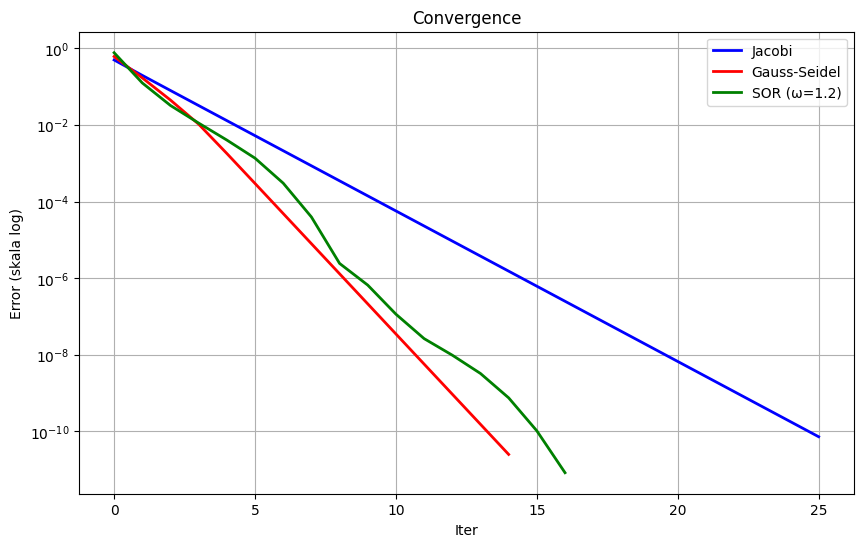

In [36]:
# punkt 1
def jacobi(A, b, x0=None, max_iter=1000, tol=1e-10):
    n = len(b)
    x = np.zeros(n) if x0 is None else x0.copy()
    x_new = np.zeros(n)
    errors = [] # lets store errors also

    for iteration in range(max_iter): # until iter limit reached
        for i in range(n): # 
            s1 = np.dot(A[i, :], x)
            s2 = A[i, i] * x[i]
            x_new[i] = (b[i] - (s1 - s2)) / A[i, i]

        errors.append(np.linalg.norm(x_new - x))
        
        if errors[-1] < tol:
            return x_new, errors, iteration + 1
        
        x = x_new.copy()
    
    return x, errors, max_iter

def gauss_seidel(A, b, x0=None, max_iter=1000, tol=1e-10):
    n = len(b)
    x = np.zeros(n) if x0 is None else x0.copy()
    errors = []
    
    for iteration in range(max_iter):
        x_old = x.copy()
        
        for i in range(n):
            s1 = np.dot(A[i, :i], x[:i])
            s2 = np.dot(A[i, i+1:], x[i+1:])
            x[i] = (b[i] - s1 - s2) / A[i, i]

        errors.append(np.linalg.norm(x - x_old))

        if errors[-1] < tol:
            return x, errors, iteration + 1
        
    return x, errors, max_iter

def sor(A, b, omega=1.2, x0=None, max_iter=1000, tol=1e-10):
    n = len(b)
    x = np.zeros(n) if x0 is None else x0.copy()
    errors = []
    
    for iteration in range(max_iter):
        x_old = x.copy()
        
        for i in range(n):
            sum_val = np.dot(A[i, :i], x[:i]) + np.dot(A[i, i+1:], x[i+1:])
            x[i] = (1 - omega) * x[i] + (omega / A[i, i]) * (b[i] - sum_val)
        
        error = np.linalg.norm(x - x_old)
        errors.append(error)
        
        if error < tol:
            return x, errors, iteration + 1
        
    return x, errors, max_iter

# punkt 2
A1 = P
b1 = np.array([1, 2, 3, 4], dtype=float)

A2 = np.array([[10, 1, 1],
               [1, 10, 1],
               [1, 1, 10]], dtype=float)
b2 = np.array([12, 12, 12], dtype=float)

A3 = np.array([[4, -1, 0, 0],
               [-1, 4, -1, 0],
               [0, -1, 4, -1],
               [0, 0, -1, 4]], dtype=float)
b3 = np.array([1, 1, 1, 1], dtype=float)

matrices = [
    ("Macierz P", A1, b1),
    ("Macierz diag. dom.", A2, b2),
    ("Macierz trójdiagonalna", A3, b3)
]

for name, A, b in matrices:
    x_exact = np.linalg.solve(A, b)
    print(f"np.linalg.solve: {x_exact}")
    
    x_jac, err_jac, iter_jac = jacobi(A, b)
    print(f"Jacobi:        iteracje={iter_jac:4d}, błąd={np.linalg.norm(x_jac - x_exact):.3e}")
    
    x_gs, err_gs, iter_gs = gauss_seidel(A, b)
    print(f"Gauss-Seidel:  iteracje={iter_gs:4d}, błąd={np.linalg.norm(x_gs - x_exact):.3e}")
    
    x_sor, err_sor, iter_sor = sor(A, b, omega=1.2)
    print(f"SOR (ω=1.2):   iteracje={iter_sor:4d}, błąd={np.linalg.norm(x_sor - x_exact):.3e}")


# lets create convergence plot
bench_matrix = A3.copy() # arbit. 4x4(or change b1 as well)
x_jac, err_jac, _ = jacobi(bench_matrix, b3)
x_gs, err_gs, _ = gauss_seidel(bench_matrix, b3)
x_sor, err_sor, _ = sor(bench_matrix, b3, omega=1.2)

plt.figure(figsize=(10, 6))
plt.semilogy(err_jac, 'b-', label='Jacobi', linewidth=2)
plt.semilogy(err_gs, 'r-', label='Gauss-Seidel', linewidth=2)
plt.semilogy(err_sor, 'g-', label='SOR (ω=1.2)', linewidth=2)
plt.xlabel('Iter')
plt.ylabel('Error (skala log)')
plt.title('Convergence')
plt.legend()
plt.grid(True)
plt.show()

Results:
- Gauss-Seidel converges faster than Jacobi
- SOR with optimal ω is the fastest(even though it doesn't look like it on our plot)
- All methods converge for diagonally dominant matrices

## Porównanie rozwiązania za pomocą metody `solve` oraz z użyciem odwrotności na przykładzie macierzy źle uwarunkowanej

***Zadanie 5.***

Dany jest układ równań $Hx=b$.
* H jest macierzą Hilberta o wymiarach $n=5x5$ (I przypadek) i $n=15x15$ (II przypadek),
* b jest wektorem o następujących elementach $b_i = 1/(n + i + 1)$ Uwaga: $i=1,\dots,n$.

Do rozwiązania układu wykorzystaj dwa algorytmy:
1. Z odwracaniem macierzy współczynników H.
2. Metodę `numpy.linalg.solve`.

Porównaj błędy obu rozwiązań. Aby ocenić błąd możesz:
* wyznaczyć wektor residuum otrzymanego rozwiązania,
* rozwiązać układ równań z innym wektorem $b$. Załóż, że wektor rozwiązania ma wszystkie elementy (współrzędne) równe 1 ($u_i = 1, i = 1, 2, . . . , n$). Wtedy $b = Hu$. Układ rozwiążemy bez korzystania z wiedzy o postaci $u$. Dopiero wynik porównamy ze znanym nam $u$.

In [37]:
# Hx = b
def analyze_hilbert(n):
    H = scipy.linalg.hilbert(n)
    i = np.arange(1, n + 1, dtype=float) # index vector
    b = 1.0 / (n + i + 1.0) # b_i = 1/(n+i+1) / element wise division

    x_inv = np.linalg.inv(H) @ b
    x_solve = np.linalg.solve(H, b)

    residuum_inv = np.linalg.norm(b - H @ x_inv)
    residuum_solve = np.linalg.norm(b - H @ x_solve)
    diff = np.linalg.norm(x_inv - x_solve)

    # Hx = Hu = b_u, x ?= u
    u = np.ones(n, dtype=float)
    b_u = H @ u
    x_inv_u = np.linalg.inv(H) @ b_u
    x_solve_u = np.linalg.solve(H, b_u)

    err_inv_u = np.linalg.norm(x_inv_u - u)
    err_solve_u = np.linalg.norm(x_solve_u - u)
    res_inv_u = np.linalg.norm(b_u - H @ x_inv_u)
    res_solve_u = np.linalg.norm(b_u - H @ x_solve_u)

    return {
        "n": n,
        "res_inverse": residuum_inv,
        "res_solve": residuum_solve,
        "solution_gap": diff,
        "u_err_inverse": err_inv_u,
        "u_err_solve": err_solve_u,
        "u_res_inverse": res_inv_u,
        "u_res_solve": res_solve_u,
    }


results = [analyze_hilbert(n) for n in (5, 15)]

for r in results:
    print(f"n = {r['n']}")
    print("  Hx = b with b_i = 1/(n+i+1):")
    print(f"    inverse   -> residuum = {r['res_inverse']:.2e}, gap vs solve = {r['solution_gap']:.2e}")
    print(f"    solve     -> residuum = {r['res_solve']:.2e}")
    print("  Hx = Hu with u = 1:")
    print(f"    inverse   -> residuum = {r['u_res_inverse']:.2e}, ||x-u|| = {r['u_err_inverse']:.2e}")
    print(f"    solve     -> residuum = {r['u_res_solve']:.2e}, ||x-u|| = {r['u_err_solve']:.2e}")

# ill conditioned
# solve gives better accuracy


n = 5
  Hx = b with b_i = 1/(n+i+1):
    inverse   -> residuum = 3.04e-13, gap vs solve = 8.33e-12
    solve     -> residuum = 1.62e-16
  Hx = Hu with u = 1:
    inverse   -> residuum = 9.91e-12, ||x-u|| = 5.14e-11
    solve     -> residuum = 0.00e+00, ||x-u|| = 2.24e-11
n = 15
  Hx = b with b_i = 1/(n+i+1):
    inverse   -> residuum = 3.12e-01, gap vs solve = 1.42e+02
    solve     -> residuum = 4.83e-15
  Hx = Hu with u = 1:
    inverse   -> residuum = 2.31e+00, ||x-u|| = 3.60e+03
    solve     -> residuum = 1.01e-15, ||x-u|| = 2.09e+01


**Zadanie domowe. Znaczenie wskaźnika uwarunkowania macierzy w szacowaniu błędu rozwiązania**


Dana jest następująca macierz A współczynników układu dwóch równań liniowy*ch*:
$$A=\begin{bmatrix}10^5 & 9.9\cdot10^4\\1.00001& 0.99\end{bmatrix}$$

Wektor prawej strony równania $Ax=b$ dla rozwiązania x = $[1, 1]^T$ możemy wyznaczyć z równości $b = Ax$.

Należy:
* obliczyć wskaźnik uwarunkowania macierzy $A$,
* rozwiązać układ równań $Ax = b$ (nie korzystając z wiedzy o przyjętym rozwiązaniu dokładnym x) korzystając z funkcji `np.linalg.solve`,
* ocenić błąd otrzymanego rozwiązania i porównać go z błędem szacowanym za pomocą wskaźnika uwarunkowania macierzy A,
* przeprowadzić skalowanie tak, aby macierz $A$ była wyważona wierszami,
* wyznaczyć nowe wartości wektora b tak, aby rozwiązanie dokładne się nie
zmieniło,
* obliczyć wskaźnik uwarunkowania macierzy skalowanej,
* rozwiązać układ równań tą samą metodą jak poprzednio,
* ocenić błąd otrzymanego rozwiązania i porównać go z błędem szacowanym za pomocą wskaźnika uwarunkowania skalowanej macierzy $A$.
1. Czy błąd numeryczny rozwiązania w obu przypadkach jest tego samego rzędu?
2. Które szacowanie błędu jest bardziej zbliżone do faktycznego błędu?

In [38]:
A = np.array([[1e5, 9.9e4], # define our matrix
              [1.00001, 0.99]])

x_exact = np.array([1.0, 1.0])
b = A @ x_exact

cond_A = np.linalg.cond(A)
print(f"Cond number of A: {cond_A:.5e}") # huge since rows are nearly proportional(nearly singular matrix -> det(A) is tiny), linear transformation almost collapses space

x_solved = np.linalg.solve(A, b) # getting solution using np
print(f"Solved x: {x_solved}, meanwhile exact: {x_exact}")
print(f"   Błąd rzeczywisty ||x_num - x_exact||: {np.linalg.norm(x_solved - x_exact):.5e}")
print(f"   Residuum ||b - Ax||:                  {np.linalg.norm(b - A @ x_solved):.5e}")
estimated_relative_error = cond_A * (np.linalg.norm(b - A @ x_solved) / np.linalg.norm(b))
estimated_error = estimated_relative_error * np.linalg.norm(x_exact)
print(f"   Szacowany błąd (z cond): {estimated_error}") # zgadza sie, zera, bo residuum zero

# so need to scale the matrix, can divide rows by their inf norms(one of the options)
row_norms = np.abs(A).max(axis=1) # or .max(.max gives error=0 everywhere)
print(f"Row norms (inf): {row_norms}")
D = np.diag(row_norms)
A_scaled = np.linalg.inv(D) @ A
print(f"\n   Matrix after scaling:\n{A_scaled}")

# new b: (since D(-1)Ax = D(-1)b => A_scaled * x = b_scaled)
b_scaled = np.linalg.inv(D) @ b
print(f"\n   Wektor b po skalowaniu: {b_scaled}, prev b: {b}")

cond_A_scaled = np.linalg.cond(A_scaled)
print(f"Cond number of A_scaled: {cond_A_scaled:.5e}, less times: {cond_A / cond_A_scaled:.2f}x") # yeah much better

x_scaled_solved = np.linalg.solve(A_scaled, b_scaled)
print(f"Solved scaled x: {x_scaled_solved}, meanwhile exact {x_exact}")
error_scaled_actual = np.linalg.norm(x_scaled_solved - x_exact)
residual_scaled = np.linalg.norm(b_scaled - A_scaled @ x_scaled_solved)
print(f"   Błąd rzeczywisty ||x_num - x_exact||: {error_scaled_actual:.5e}")
print(f"   Residuum ||b - Ax||:                   {residual_scaled:.5e}")
relative_residual_scaled = residual_scaled / np.linalg.norm(b_scaled)
estimated_relative_error_scaled = cond_A_scaled * relative_residual_scaled
estimated_error_scaled = estimated_relative_error_scaled * np.linalg.norm(x_exact)
print(f"   Szacowany błąd (z cond): {estimated_error_scaled:.5e}")
# wszedzie zera

# 1) zalezy od tego jak skalujemy
# 2) dla skalowanej, mniejszy cond number, mniejszy upper bound error

Cond number of A: 2.00010e+10
Solved x: [1. 1.], meanwhile exact: [1. 1.]
   Błąd rzeczywisty ||x_num - x_exact||: 1.57803e-11
   Residuum ||b - Ax||:                  0.00000e+00
   Szacowany błąd (z cond): 0.0
Row norms (inf): [1.00000e+05 1.00001e+00]

   Matrix after scaling:
[[1.        0.99     ]
 [1.        0.9899901]]

   Wektor b po skalowaniu: [1.99      1.9899901], prev b: [1.99000e+05 1.99001e+00]
Cond number of A_scaled: 4.00022e+05, less times: 49999.75x
Solved scaled x: [1. 1.], meanwhile exact [1. 1.]
   Błąd rzeczywisty ||x_num - x_exact||: 0.00000e+00
   Residuum ||b - Ax||:                   0.00000e+00
   Szacowany błąd (z cond): 0.00000e+00
